In [1]:
from typing import TypedDict
from langgraph.graph import StateGraph, START, END

class State(TypedDict):
    topic: str
    joke: str

def refine_topic(state: State):
    return {"topic": state["topic"] + " and cats"}

def generate_joke(state: State):
    return {"joke": f"This is a joke about {state['topic']}"}

graph = (
    StateGraph(State)
    .add_node(refine_topic)
    .add_node(generate_joke)
    .add_edge(START, "refine_topic")
    .add_edge("refine_topic", "generate_joke")
    .add_edge("generate_joke", END)
    .compile()
)


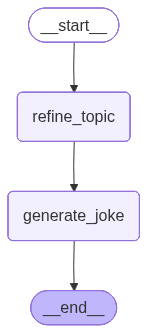

In [2]:
graph

In [6]:
inputs =  {"topic": "ice cream"}

In [8]:
for chunk in graph.stream(
    {"topic": "ice cream"},
    stream_mode="values",
):
    print(chunk)

{'topic': 'ice cream'}
{'topic': 'ice cream and cats'}
{'topic': 'ice cream and cats', 'joke': 'This is a joke about ice cream and cats'}


In [9]:
for chunk in graph.stream(
    {"topic": "ice cream"},
    stream_mode="updates",
):
    print(chunk)

{'refine_topic': {'topic': 'ice cream and cats'}}
{'generate_joke': {'joke': 'This is a joke about ice cream and cats'}}


In [20]:

for chunk in graph.stream(
    {"topic": "ice cream"},
    stream_mode="joke",
):
    print(chunk)

In [19]:
for chunk in graph.stream(
    {"topic": "ice cream"},
    stream_mode="debug",
):
    print(chunk)

{'step': 1, 'timestamp': '2025-09-27T07:26:56.834925+00:00', 'type': 'task', 'payload': {'id': 'e41061f9-1598-96ae-276e-a3735bad929c', 'name': 'refine_topic', 'input': {'topic': 'ice cream'}, 'triggers': ('branch:to:refine_topic',)}}
{'step': 1, 'timestamp': '2025-09-27T07:26:56.835374+00:00', 'type': 'task_result', 'payload': {'id': 'e41061f9-1598-96ae-276e-a3735bad929c', 'name': 'refine_topic', 'error': None, 'result': [('topic', 'ice cream and cats')], 'interrupts': []}}
{'step': 2, 'timestamp': '2025-09-27T07:26:56.835912+00:00', 'type': 'task', 'payload': {'id': 'c21aa4e2-49b9-2913-1974-9b7920ddc6f2', 'name': 'generate_joke', 'input': {'topic': 'ice cream and cats'}, 'triggers': ('branch:to:generate_joke',)}}
{'step': 2, 'timestamp': '2025-09-27T07:26:56.836202+00:00', 'type': 'task_result', 'payload': {'id': 'c21aa4e2-49b9-2913-1974-9b7920ddc6f2', 'name': 'generate_joke', 'error': None, 'result': [('joke', 'This is a joke about ice cream and cats')], 'interrupts': []}}


In [21]:
from typing import TypedDict
from langgraph.config import get_stream_writer
from langgraph.graph import StateGraph, START

class State(TypedDict):
    query: str
    answer: str

def node(state: State):
    writer = get_stream_writer()  # (1)!
    writer({"custom_key": "Generating custom data inside node"}) # (2)!
    return {"answer": "some data"}

graph = (
    StateGraph(State)
    .add_node(node)
    .add_edge(START, "node")
    .compile()
)

inputs = {"query": "example"}

# Usage
for chunk in graph.stream(inputs, stream_mode="custom"):  # (3)!
    print(chunk)

{'custom_key': 'Generating custom data inside node'}


In [26]:

from langgraph.prebuilt import create_react_agent

agent = create_react_agent(
    "openai:gpt-5",
    tools=[]
)

for chunk in agent.stream(
    {"messages": [{"role": "user", "content": "what is the weather in sf"}]},
    stream_mode="updates"
):
    print(chunk)
    print("\n")

{'agent': {'messages': [AIMessage(content='Do you mean San Francisco, California? Do you want the current conditions or a forecast for a specific date/time? I can’t fetch live weather in this chat, but if you tell me the timeframe (and optionally the neighborhood/ZIP) I’ll summarize what to expect and what to wear. If you just need a quick check, search “San Francisco weather now” or use weather.gov with ZIP 94103.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 1437, 'prompt_tokens': 12, 'total_tokens': 1449, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 1344, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-5-2025-08-07', 'system_fingerprint': None, 'id': 'chatcmpl-CKJwHCzKrEFxHIa9CrEvOSB59JjiE', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--8de69fd6-3b9c-491d-ac60-88748dff6521-0